### 9. Feladatsor

Implicit módszerek

#### 1. Feladat

Tekintsük az implicit Euler-módszert.

$$
y_{n+1} = y_n + h_nf(t_{n+1}, y_{n+1})
$$

Vezessük vissza az egyenlet megoldását az alábbi gyökkeresési problémára:
$$
g_{n+1}(y) = y - h_nf(t_{n+1}, y) - y_n
$$


Egyszerűen használható gyökkeresési módszer (`fsolve`): 

In [1]:
fsolve(@(x)(x^2 - 1), 1)

ans =  1


a) Implementáljuk a szokásos formátumban.

In [2]:
function [ts, ys] = implicit_euler(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for n=1:(numel(ts) - 1)
        h = ts(n+1) - ts(n);
        
        g = @(y)(y - h*f(ts(n+1), y) - ys(:, n));

        ys(:, n+1) = fsolve(g, ys(:, n));
    end
end

In [3]:
[ts, ys] = implicit_euler(@(t, x)(x), 0:.1:1, 1);
ys

ys =

 Columns 1 through 8:

   1.0000   1.1111   1.2346   1.3717   1.5242   1.6935   1.8817   2.0908

 Columns 9 through 11:

   2.3231   2.5812   2.8680



In [4]:
function [ts, ys] = explicit_euler(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for n=1:(numel(ts) - 1)
        h = ts(n+1) - ts(n);
        
        k1 = f(ts(n), ys(:, n));

        ys(:, n+1) = ys(:, n) + h * k1;
    end
end

[ts, ys] = explicit_euler(@(t, x)(x.^2), 0:.1:1, .5);

b) Hogyan érdemes változtatni a kódunkon, ha a feladat garantáltan lineáris és autonóm?

$$
y_{n+1} = y_n + h_nAy_{n+1}
$$

$$
y_{n+1} = (I-h_nA)^{-1}y_n
$$

In [6]:
function [ts, ys] = implicit_euler_linear_autonomous_system(A, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;

    I = eye(size(A));
    for n=1:(numel(ts) - 1)
        h = ts(n+1) - ts(n);
    
        ys(:, n+1) = (I-h*A)\ys(:, n);
    end
end

[ts, ys] = implicit_euler_linear_autonomous_system(diag([-1, -1]), 0:.1:1, [1; 1]);
ys

ys =

 Columns 1 through 8:

   1.00000   0.90909   0.82645   0.75131   0.68301   0.62092   0.56447   0.51316
   1.00000   0.90909   0.82645   0.75131   0.68301   0.62092   0.56447   0.51316

 Columns 9 through 11:

   0.46651   0.42410   0.38554
   0.46651   0.42410   0.38554



#### 2. feladat

Tekintsük a kétdimenziós lineáris autonóm egyenletet:
$$
    \dot x = Ax,
$$
ahol $A$ szimmetrikus mátrix $\{-50, -100\}$ sajátértékekkel.

a)   Ábrázoljuk az egyenlet fázisképét a $0$ körül, illetve néhány numerikus megoldás trajektóriáját is.

In [7]:
function helper2(A, method, h)
    A
    [X, Y] = meshgrid(-1:.1:1, -1:.1:1);

    UV=(A * [X(:)'; Y(:)']);
    U = reshape(UV(1, :),size(X));
    V = reshape(UV(2, :), size(Y));
    quiver(X, Y, U, V)
    xlim([-1, 1])
    ylim([-1, 1])
    hold on;

    [ts, ys] = method(@(t, x)(A*x), 0:h:(pi), .5*[-.5; .5*sqrt(3)/2]);
    plot(ys(1, :), ys(2, :), 'o-r')

    hold on;

    [ts, ys] = method(@(t, x)(A*x), 0:h:(pi), .5*[.5; -sqrt(3)/2]);
    plot(ys(1, :), ys(2, :), 'o-g')
end

In [8]:
S = randi(100, [2 2]);
[Q, _] = qr(S);

A =

  -50.2700   -3.6643
   -3.6643  -99.7300



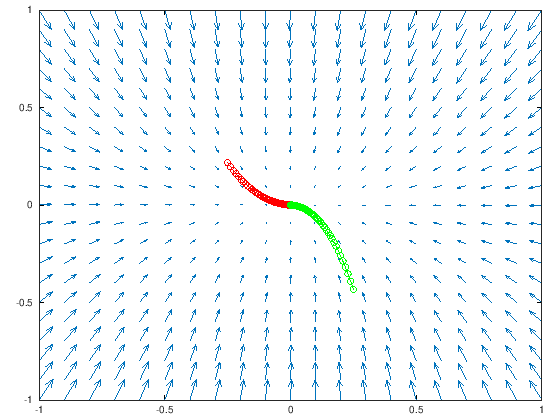

In [9]:
A2 = Q' * diag([-100, -50]) * Q;
helper2(A2, @explicit_euler, .001)

b) Mi történik ha a feladatra EE helyett IE módszert alkalmazunk? Megengedhetünk nagyobb lépéshosszokat? Összességében melyik módszer a hatékonyabb ebben az esetben?

A =

  -50.2700   -3.6643
   -3.6643  -99.7300



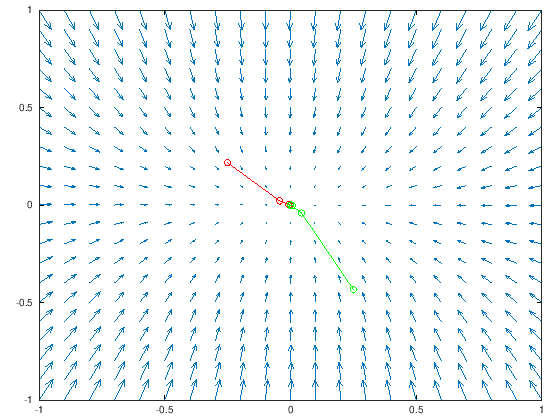

In [13]:
helper2(A2, @implicit_euler, .1)

#### 3. feladat

Tekintsük az alábbi tridiagonális $A_n$ mátrixokat:

In [12]:
n = 5;
e = ones(n, 1);
A_n = n*spdiags([e, -2*e, e], [-1, 0, 1], n, n);
full(A_n)

ans =

  -10    5    0    0    0
    5  -10    5    0    0
    0    5  -10    5    0
    0    0    5  -10    5
    0    0    0    5  -10



a) Milyen elméleti korlátot tudnánk adni az $A_n$ mátrix sajátértékeire? Ábrázoljuk $3 \leq n\leq 1000$ függvényében $A_n$ legkisebb és legnagyobb sajátértékét.

b) Módszeresen hasonlítsuk össze az IE és az EE módszer viselkedését az 

$$
\dot x = A_n x\quad [0,1]\text{-en}
$$
feladaton. Kezdetiérték lehet a csupa-egy-vektor.

#### 4. feladat
Tekintsük a

$$
    \sum_{k = 0}^s \alpha_k y_{n-k} = h_{n-1}\sum_{k = 0}^s  \beta_k f_{n-k}
$$

formulával adott lineáris többlépéses módszereket. Tegyük fel, hogy $\alpha_0 = 1$ az egyértelműség kedvéért.

a) Milyen $\alpha_k$, $\beta_k$ választással kapjuk vissza az implicit Euler módszert?

b) Implementáljunk egy nekünk tetsző paraméterezésű módszert ([inspiráció](https://en.wikipedia.org/wiki/Linear_multistep_method)).

c) Legyenek bemeneti paraméter az $\alpha$, $\beta$ együtthatóvektorok is, azaz egészítsük ki a lenti függvénydefiníciót.

In [ ]:
function [ts, ys] = lmm(alphas, betas, f, ts, y0)
    
end

d) Az előző részfeladat megoldásának felhasználásával implementáljuk az IE módszert.

In [ ]:
function [ts, ys] = implicit_euler_as_lmm(f, ts, y0)
   
end